# Program to predict Heart Disease using Logistic Regression

# Introduction

WHO has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases.considering India One in 4 deaths are now because of CVDs with ischemic heart disease and stroke responsible for >80% of this burden .The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

# Data Set Information:

This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

In [26]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [27]:
#Loading Data
df=pd.read_csv("heart_disease.csv",names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","Target"],na_values="?")
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
5,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,NaN,NaN,0
6,65,1,4,150.0,236.0,1.0,1,105.0,1.0,0.0,NaN,NaN,NaN,3
7,60,1,3,180.0,0.0,0.0,1,140.0,1.0,1.5,2.0,NaN,NaN,0
8,60,1,3,120.0,0.0,NaN,0,141.0,1.0,2.0,1.0,NaN,NaN,3
9,60,1,2,160.0,267.0,1.0,1,157.0,0.0,0.5,2.0,NaN,NaN,1


# Attributes Details

Data contains;

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure

chol - serum cholestoral

fbs - (fasting blood sugar) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels 

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1,2,3,4=yes, 0=no)

# Getting Basic Statistical Info of the DataSet

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  144 non-null    float64
 4   chol      193 non-null    float64
 5   fbs       193 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   147 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   144 non-null    float64
 10  slope     98 non-null     float64
 11  ca        2 non-null      float64
 12  thal      34 non-null     float64
 13  Target    200 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 22.0 KB


In [29]:
df.shape

(200, 14)

In [30]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Target'],
      dtype='object')

In [31]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
Target        int64
dtype: object

# Finding Null Value

In [32]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
Target        0
dtype: int64

In [33]:
df["slope"].value_counts()

2.0    53
3.0    29
1.0    16
Name: slope, dtype: int64

we see that around 50% null value found in column "slope"

In [34]:
df["ca"].value_counts()

0.0    2
Name: ca, dtype: int64

column "ca" has only one value and has around 99% of null values.so dropping of column "ca " as it doesnott affect our dataset

In [35]:
df["thal"].value_counts()

7.0    22
6.0     8
3.0     4
Name: thal, dtype: int64

in column "thal" we find that around 83% of values were missing.so dropping of column "thal " as it doesnot affect our dataset

# Filling NaN values

when we try to remove NaN from columns ["trestbps","exang","oldpeak","slope"] it may result in loss of data since the missing count is more in all column

in order to overcome this we use the mode value of the column to fill the missing data

Here we replace the missing value with the mode value because of classification 

In [36]:
df["trestbps"].mode()

0    120.0
dtype: float64

In [37]:
df["trestbps"].fillna(df['trestbps'].mode(),inplace=True)

In [38]:
df["thalach"].mode()

0    120.0
1    140.0
dtype: float64

In [39]:
df["thalach"].fillna(df['thalach'].mode(),inplace=True)

In [40]:
df["exang"].mode()

0    1.0
dtype: float64

In [41]:
df["exang"].fillna(df['exang'].mode(),inplace=True)

In [42]:
df["oldpeak"].mode()

0    0.0
dtype: float64

In [43]:
df["oldpeak"].fillna(df['oldpeak'].mode(),inplace=True)

In [44]:
df["slope"].mode()

0    2.0
dtype: float64

In [45]:
df["slope"].fillna(df['slope'].mode(),inplace=True)

In [46]:
#Dropping column "ca" and "thal"
df.drop(columns=["ca","thal"],inplace=True)

In [47]:
df.dropna(inplace=True)

In [48]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
Target      0
dtype: int64

In [49]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,Target
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,59.885057,0.965517,3.701149,133.597701,178.321839,0.310345,0.632184,124.620690,0.758621,1.774713,2.114943,1.701149
std,7.485529,0.183523,0.700746,22.494681,117.312591,0.465317,0.683951,20.115504,0.430400,0.943548,0.654595,1.172504
min,37.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.000000
25%,56.000000,1.000000,4.000000,121.000000,0.000000,0.000000,0.000000,111.000000,1.000000,1.000000,2.000000,1.000000
50%,60.000000,1.000000,4.000000,130.000000,218.000000,0.000000,1.000000,122.000000,1.000000,1.500000,2.000000,2.000000
75%,64.000000,1.000000,4.000000,144.000000,258.000000,1.000000,1.000000,140.000000,1.000000,2.500000,3.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,4.000000


1)Here we find that the median is higher than mean in most of the columns

If the mean is less than the median, the distribution is negatively skewed.

2)the maximum and the 75% has a normal range of difference 

From 1) and 2) we infer that we may have few outliers and skewness in some of the attributes 



# Exploring Data Attributes 

#### univariate analysis

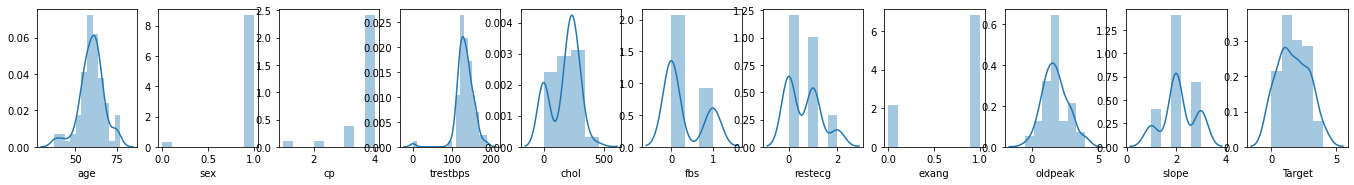

In [344]:

collist=df.columns.values
ncol=14
nrow=10
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]])


##### KEY OBSERVATION

1)The attributes "age","oldpeak","Target" have a normal distributions

2)the female have less chance of affected from Heart Disease

3)persons with low Fasting blood sugar level has has high chance of getting heart disease

4)person with exercise induced angina(exang) have high chance of getting heart disease

#### Bivariate analysis

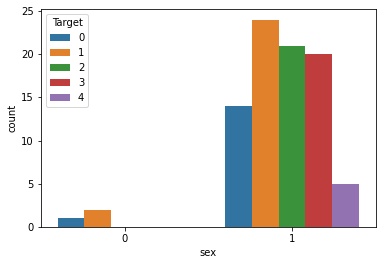

   sex  Target
0    0       2
1    1     146


In [316]:
#Relation b/w sex and target
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="sex",data=df,hue="Target")
plt.show()

sex=df.groupby("sex").sum()["Target"].reset_index()
print(sex)


###### The plot shows that female has less chance of heart disease than male

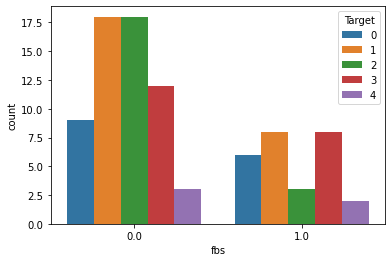

   fbs  Target
0  0.0     102
1  1.0      46


In [324]:
#Relation b/w sex and target
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="fbs",data=df,hue="Target")
plt.show()

fbs=df.groupby("fbs").sum()["Target"].reset_index()
print(sex)


fbs=Fasting blood sugar   ,        yes=1        ,     no=0

the plot shows that 

person with fasting blood sugar(1) has low amount of heart disease

person without fbs(0) has has high chance of getting heart disease


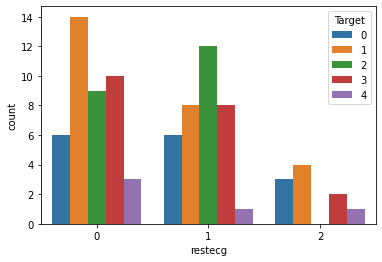

   restecg  Target
0        0      74
1        1      60
2        2      14


In [329]:
#Relation b/w restecg and target
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="restecg",data=df,hue="Target")
plt.show()

sex=df.groupby("restecg").sum()["Target"].reset_index()
print(sex)


   Target  trestbps
0       0    1984.0
1       1    3336.0
2       2    2880.0
3       3    2633.0
4       4     790.0


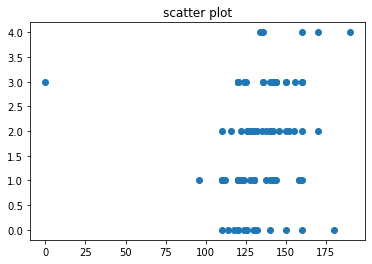

In [341]:
plt.scatter(df["trestbps"],df["Target"])
plt.title("scatter plot")


Target=df.groupby("Target").sum()["trestbps"].reset_index()
print(Target)

###### the scatter plot shows that a person with and without heartdisease has maximun heart rate recieved. from this we cant conclude anything about person with and without heart disease

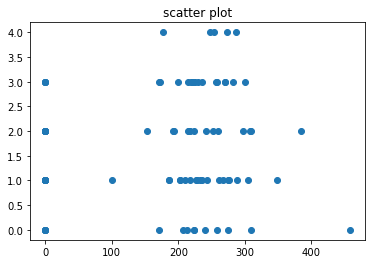

   Target    chol
0       0  2578.0
1       1  4491.0
2       2  3461.0
3       3  3745.0
4       4  1239.0


In [343]:
plt.scatter(df["chol"],df["Target"])
plt.title("scatter plot")
plt.show()
chol=df.groupby("Target").sum()["chol"].reset_index()
print(chol)


###### we infer that most of the person with heart disease have cholestral level range between 200 to 3000

# Multivariate analysis

### correlation

In [50]:
cor=df.corr()
cor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,Target
age,1.000000,0.090188,0.086479,0.218698,0.059523,0.140556,-0.076490,-0.134893,0.117609,0.115156,0.109515,0.315328
sex,0.090188,1.000000,-0.081063,0.019134,-0.147463,-0.009391,-0.009583,0.103508,0.040610,0.122491,0.130168,0.167703
cp,0.086479,-0.081063,1.000000,0.105885,0.223115,-0.211506,-0.013664,-0.133523,0.452011,-0.002769,0.101106,0.003253
trestbps,0.218698,0.019134,0.105885,1.000000,0.288669,0.196475,0.125555,-0.083190,0.311726,0.156308,0.170588,0.168649
chol,0.059523,-0.147463,0.223115,0.288669,1.000000,0.130218,0.003956,-0.107273,0.262711,0.094009,0.150782,0.102489
fbs,0.140556,-0.009391,-0.211506,0.196475,0.130218,1.000000,0.180163,-0.020819,-0.260271,-0.095800,0.034226,0.001470
restecg,-0.076490,-0.009583,-0.013664,0.125555,0.003956,0.180163,1.000000,0.133421,-0.028604,-0.144312,-0.086274,-0.080666
thalach,-0.134893,0.103508,-0.133523,-0.083190,-0.107273,-0.020819,0.133421,1.000000,-0.175896,0.142112,-0.108801,-0.045782
exang,0.117609,0.040610,0.452011,0.311726,0.262711,-0.260271,-0.028604,-0.175896,1.000000,0.193815,0.223438,0.247102
oldpeak,0.115156,0.122491,-0.002769,0.156308,0.094009,-0.095800,-0.144312,0.142112,0.193815,1.000000,0.332338,0.389335


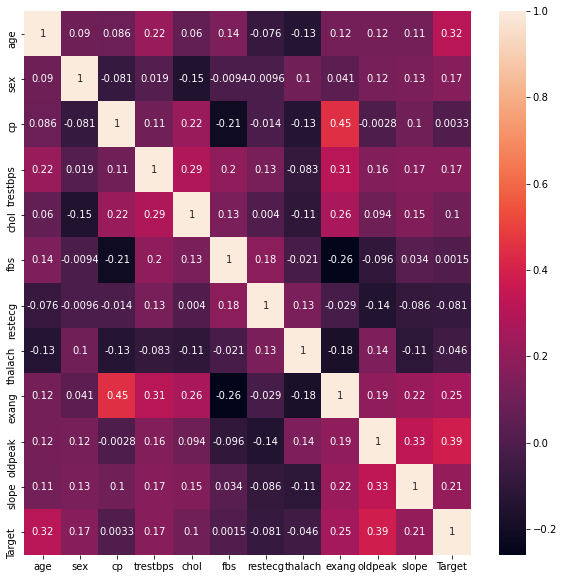

In [346]:
#heatmap for correlation
plt.figure(figsize=(10,10))
sns.heatmap((cor),annot=True)

Key observation

from the above result it is clear that some columns making positive correlation while some has negative correlation to the target variable 

columns making positive correlation

1)age

2)sex

3)cp

4)trestbps 

5)chol  

6)fbs

7)exang

8)oldpeak

9)slope

columns making negative correlation

1)restecg

2)thalach                   

                 
                  




# DATA CLEANING

In [52]:
#Droping columns which are needed no more
df.drop(columns=["thalach"],inplace=True)


# Outliers

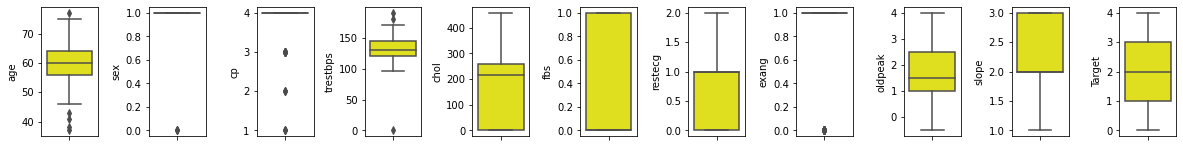

In [53]:
#Plotting Outliers
collist=df.columns.values
ncol=30
nrow=15
plt.figure(figsize=(3*nrow,ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color="yellow",orient="v")
    plt.tight_layout()               

outliers present in most of the columns ["Age","sex","cp","Trestbps","chol","oldpeak","slope"]

In [54]:
#Removing Outliers
#Z-score Techinique
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.41854093, 0.18898224, 0.42894714, 0.28626384, 0.70028   ,
        0.67082039, 0.54089872, 0.56407607, 1.30612345, 0.1766112 ,
        0.2563599 ],
       [0.01544431, 0.18898224, 0.42894714, 0.07143748, 0.34018668,
        0.67082039, 0.54089872, 0.56407607, 0.29283631, 1.35990624,
        0.2563599 ],
       [0.65638338, 0.18898224, 0.42894714, 0.37568917, 0.42592319,
        0.67082039, 0.54089872, 0.56407607, 0.77313687, 1.71312864,
        0.60145976],
       [0.82163754, 0.18898224, 1.00637597, 1.0551161 , 0.29731843,
        1.49071198, 2.01146713, 0.56407607, 0.50603094, 0.1766112 ,
        1.45927941],
       [0.82163754, 0.18898224, 1.00637597, 0.60798945, 1.52886912,
        0.67082039, 0.54089872, 1.77281052, 2.42478266, 1.71312864,
        1.45927941],
       [0.01544431, 0.18898224, 1.00637597, 2.07477043, 1.52886912,
        0.67082039, 0.54089872, 0.56407607, 0.29283631, 0.1766112 ,
        1.45927941],
       [0.01544431, 0.18898224, 2.44169908, 1.18051714, 0.

In [55]:
threshold=3
print(np.where(z>3))

(array([21, 32, 37, 39, 60, 62, 75, 84], dtype=int64), array([3, 2, 2, 1, 1, 2, 0, 1], dtype=int64))


In [56]:
df.shape

(87, 11)

In [57]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(79, 11)

In [58]:
#Percentage loss
loss=(186-169)/186*100
loss

9.13978494623656

# Skewness

In [59]:
#finding Skewness
df_new.skew()

age        -0.380395
sex         0.000000
cp         -2.591651
trestbps    0.622126
chol       -0.445905
fbs         0.869851
restecg     0.612085
exang      -1.612243
oldpeak     0.286692
slope      -0.149461
Target      0.196737
dtype: float64

Range of Skewness is (+/- 0.5)
from the above observation the following columns falls under high skewness

1) cp

2) exang

3) fbs



# Seperating Target Variable


In [60]:
x_l=df_new.drop(["Target"],axis=1)
y=df_new["Target"]

In [61]:
#removing Skewness
#using Power Transformer
from sklearn.preprocessing import power_transform
x_l=power_transform(x_l,method="yeo-johnson")

# Scaling Input Variable

In [62]:
# Algorithms requires all features to be on common scale. 
#using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x_l)
x


array([[ 0.33184309,  0.        ,  0.42320439,  0.36788348,  0.69274511,
        -0.66057826,  0.77916929,  0.48412292,  1.23750488, -0.23488854],
       [-0.10525185,  0.        ,  0.42320439, -0.09196714,  0.47748884,
        -0.66057826,  0.77916929,  0.48412292, -0.25813335,  1.34216897],
       [-0.79597439,  0.        ,  0.42320439,  0.4759306 ,  0.53039431,
        -0.66057826,  0.77916929,  0.48412292,  0.75824488, -1.71123253],
       [ 0.78573836,  0.        , -2.35733049, -1.64326544,  0.45060821,
         1.51382518,  1.58688988,  0.48412292, -0.47310089, -0.23488854],
       [ 0.78573836,  0.        , -2.35733049, -0.87823677, -1.61281567,
        -0.66057826,  0.77916929, -2.06559112, -2.7368579 , -1.71123253],
       [-0.10525185,  0.        , -2.35733049,  2.13154845, -1.61281567,
        -0.66057826,  0.77916929,  0.48412292, -0.25813335, -0.23488854],
       [-0.10525185,  0.        , -2.3795732 ,  1.34365515,  0.72698114,
         1.51382518,  0.77916929, -2.06559112

# preparing dataset for model training


### splitting the testing and training data

In [63]:
#importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [348]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10)

# finding best model

Popular algorithms that can be used for multi-class classification include:

1)k-Nearest Neighbors.

2)Decision Trees.

3)Support Vector Machine

4)Naive Bayes.

4)Random Forest Regressor

6)Gradient Boosting

# 1)k-Nearest Neighbour

In [349]:
#Hyerparameter tuning for KNeighborsClassifier 
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
parameters={"algorithm":["auto", "ball_tree", "kd_tree", "brute"],"weights":["uniform","distance"]}
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'algorithm': 'auto', 'weights': 'distance'}


In [350]:
knn=KNeighborsClassifier(algorithm="auto",weights="distance")
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
knn.fit(x_train,y_train)
knn_test_pred=knn.predict(x_test)
print(" Accuracy score is :",accuracy_score(y_test,knn_test_pred)*100)

 Accuracy score is : 18.75


In [351]:
#classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5,test_size=.20)
print(classification_report(y_test,knn_test_pred))





              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.25      0.20      0.22         5
           2       0.20      0.25      0.22         4
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3

    accuracy                           0.12        16
   macro avg       0.09      0.09      0.09        16
weighted avg       0.13      0.12      0.12        16



# 2)DecisionTreeClassifier

In [352]:
#Hyerparameter tuning for DecisionTreeClassifier 
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={"criterion":["gini", "entropy"],"splitter":["best","random"]}
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'criterion': 'gini', 'splitter': 'random'}


In [353]:
#finding accuracy score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt=DecisionTreeClassifier(criterion="entropy",splitter="best")
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
dt_pred=dt.predict(x_test)
dts=accuracy_score(y_test,dt_pred)
print("accuracy score is : ",dts*100)


accuracy score is :  18.75


In [354]:
#classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=.20)
print(classification_report(y_test,dt_pred))



              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.43      0.43      0.43         7
           2       0.00      0.00      0.00         1
           3       0.33      0.20      0.25         5

    accuracy                           0.31        16
   macro avg       0.32      0.24      0.27        16
weighted avg       0.39      0.31      0.34        16



# 3)Supprt vector Machine(SVC)

In [355]:
#Hyerparameter tuning for SVM (SVC)
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters={"kernel":["linear","poly","rbf","sigmoid"],"gamma":["scale","auto"]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'gamma': 'scale', 'kernel': 'sigmoid'}


In [356]:
#finding accuracy score
from sklearn.model_selection import cross_val_score
svc=SVC(kernel="rbf",gamma="scale")
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6,test_size=.20)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
svc_pred=svc.predict(x_test)
svc=accuracy_score(y_test,svc_pred)
print("accuracy score is : ",svc*100)


accuracy score is :  37.5


In [357]:
# classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6,test_size=.20)
print(classification_report(y_test,svc_pred))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.36      1.00      0.53         4
           2       0.50      0.40      0.44         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1

    accuracy                           0.38        16
   macro avg       0.17      0.28      0.20        16
weighted avg       0.25      0.38      0.27        16



# 4) Naive Bayes

In [358]:
#Hyerparameter tuning for  Naive Bayes 
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
parameters={"priors" :[ None], "var_smoothing" :[ 1e-09]}
nb=GaussianNB()
clf=GridSearchCV(nb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'priors': None, 'var_smoothing': 1e-09}


In [359]:
#finding accuracy Score
from sklearn.model_selection import cross_val_score
nb=GaussianNB(priors = None, var_smoothing = 1e-09)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=.20)
nb.fit(x_train,y_train)
nb.score(x_train,y_train)
nb_pred=nb.predict(x_test)
nbc=accuracy_score(y_test,svc_pred)
print("accuracy score is : ",nbc*100)


accuracy score is :  25.0


In [360]:
# classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=.20)
print(classification_report(y_test,nb_pred))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.43      0.60         7
           2       0.00      0.00      0.00         1
           3       1.00      0.20      0.33         5
           4       0.00      0.00      0.00         0

    accuracy                           0.25        16
   macro avg       0.40      0.13      0.19        16
weighted avg       0.75      0.25      0.37        16



# 5)Random Forest classifier

In [361]:
#Hyerparameter tuning for RandomForestClassifier 
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters={"n_estimators" :[1,10,100,1000], "random_state": list(range(0,10))}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'n_estimators': 1000, 'random_state': 1}


In [362]:
##### finding accuracy score
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier(n_estimators = 100, random_state=5)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
rf_pred=rf.predict(x_test)
rfc=accuracy_score(y_test,rf_pred)
print("accuracy score is : ",rfc*100)


accuracy score is :  62.5


In [363]:
# classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)
print(classification_report(y_test,rf_pred))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.50      0.40         6
           2       0.33      0.20      0.25         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.25        16
   macro avg       0.13      0.14      0.13        16
weighted avg       0.23      0.25      0.23        16



# 6) Gradient Boosting Classifier

In [364]:
#Hyerparameter tuning for GradientBoostingClassifier
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
parameters={"n_estimators" :[1,10,100,1000], "criterion": ["friedman_mse", "mse", "mae"]}
gb=GradientBoostingClassifier()
clf=GridSearchCV(gb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'criterion': 'friedman_mse', 'n_estimators': 10}


In [365]:
#finding accuracy score
from sklearn.model_selection import cross_val_score
gb=GradientBoostingClassifier(criterion ="mae", n_estimators=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=.20)
gb.fit(x_train,y_train)
gb.score(x_train,y_train)
gb_pred=gb.predict(x_test)
gbc=accuracy_score(y_test,gb_pred)
print("accuracy score is : ",gbc*100)


accuracy score is :  6.25


In [366]:
# classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=.20)
print(classification_report(y_test,gb_pred))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         7
           2       0.06      1.00      0.12         1
           3       0.00      0.00      0.00         5

    accuracy                           0.06        16
   macro avg       0.02      0.25      0.03        16
weighted avg       0.00      0.06      0.01        16



BEST ALGORITHM FOR OUR DATASET:
    
    from all the Muliticlass classifier method only Random Forest Classifier performs well.
    
    so we select "RANDOM FREST CLASSIFIER" as the best method

# SAVING MODEL

In [374]:
import pickle
filename="heart_disease.pkl"
pickle.dump(rf,open(filename,"wb"))

In [368]:
#conclusion

In [371]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_con=pd.DataFrame({"original":a,"Predicted":predicted})
df_con.head(10)

,original,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
5,3,3
6,3,3
7,3,2
8,1,1
9,1,1


The conclusion shows  accuracy is of only 60% mark in Random forest regressor. This is because of very small amount of data and high missing values.

To improve Accuracy Large collection of Datas and High Engineering is needed 